In [1]:
pip install mysql-connector-python pandas seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install sqlalchemy

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: sqlalchemy in c:\users\sakin\appdata\local\programs\python\python311\lib\site-packages (2.0.39)




[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import pandas as pd
import pymysql

# Connect using pymysql
conn = pymysql.connect(
    host="localhost",
    user="root",
    password="Mudassir@786",
    database="elevatelabs"
)

# Read query into DataFrame
query = "SELECT * FROM store_sales;"
df = pd.read_sql(query, conn)

conn.close()

df.head()


C:\Users\sakin\AppData\Local\Temp\ipykernel_4448\3006347231.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,ProductVariety,MarketingSpend,CustomerFootfall,StoreSize,EmployeeEfficiency,StoreAge,CompetitorDistance,PromotionsCount,EconomicIndicator,StoreLocation,StoreCategory,MonthlySalesRevenue
0,581,29.0,1723,186,84.9,1,12,6,108.3,Los Angeles,Electronics,284.90
1,382,31.0,1218,427,75.8,18,11,6,97.8,Los Angeles,Electronics,308.21
2,449,35.0,2654,142,92.8,14,11,6,101.1,Los Angeles,Grocery,292.11
3,666,9.0,2591,159,66.3,11,11,4,115.1,Sacramento,Clothing,279.61
4,657,35.0,2151,275,89.1,28,12,7,93.4,Palo Alto,Electronics,359.71


In [3]:
pip install pymysql


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
# Check shape and missing values
print("Data shape:", df.shape)
print("\nMissing values:\n", df.isnull().sum())

# Describe numeric columns
df.describe()

Data shape: (1650, 12)

Missing values:
 ProductVariety         0
MarketingSpend         0
CustomerFootfall       0
StoreSize              0
EmployeeEfficiency     0
StoreAge               0
CompetitorDistance     0
PromotionsCount        0
EconomicIndicator      0
StoreLocation          0
StoreCategory          0
MonthlySalesRevenue    0
dtype: int64


,ProductVariety,MarketingSpend,CustomerFootfall,StoreSize,EmployeeEfficiency,StoreAge,CompetitorDistance,PromotionsCount,EconomicIndicator,MonthlySalesRevenue
count,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000
mean,500.915758,27.460000,2020.028485,272.997576,72.198545,15.447879,9.933939,5.500606,99.761939,299.253285
std,148.054223,13.014753,484.025786,131.048595,13.019817,8.667779,3.117450,1.388356,14.614712,65.543755
min,100.000000,5.000000,500.000000,50.000000,50.000000,1.000000,1.000000,3.000000,60.000000,106.710000
25%,396.000000,17.000000,1691.000000,156.000000,61.000000,8.000000,8.000000,4.000000,90.000000,254.125000
50%,500.500000,27.000000,2021.000000,273.000000,72.100000,16.000000,10.000000,5.000000,100.300000,297.440000
75%,602.750000,38.000000,2350.750000,385.500000,83.100000,23.000000,12.000000,7.000000,109.600000,344.222500
max,1092.000000,50.000000,3627.000000,500.000000,94.900000,30.000000,20.000000,8.000000,140.000000,534.260000


In [8]:
df = df.fillna(df.mean(numeric_only=True))

In [12]:
# Select only numeric columns before correlation
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()

# Show correlation with MonthlySalesRevenue
print(corr['MonthlySalesRevenue'].sort_values(ascending=False))

MonthlySalesRevenue    1.000000
ProductVariety         0.674146
StoreSize              0.602992
StoreAge               0.039384
EconomicIndicator      0.037969
EmployeeEfficiency     0.025451
PromotionsCount       -0.002674
MarketingSpend        -0.006068
CompetitorDistance    -0.022428
CustomerFootfall      -0.031482
Name: MonthlySalesRevenue, dtype: float64


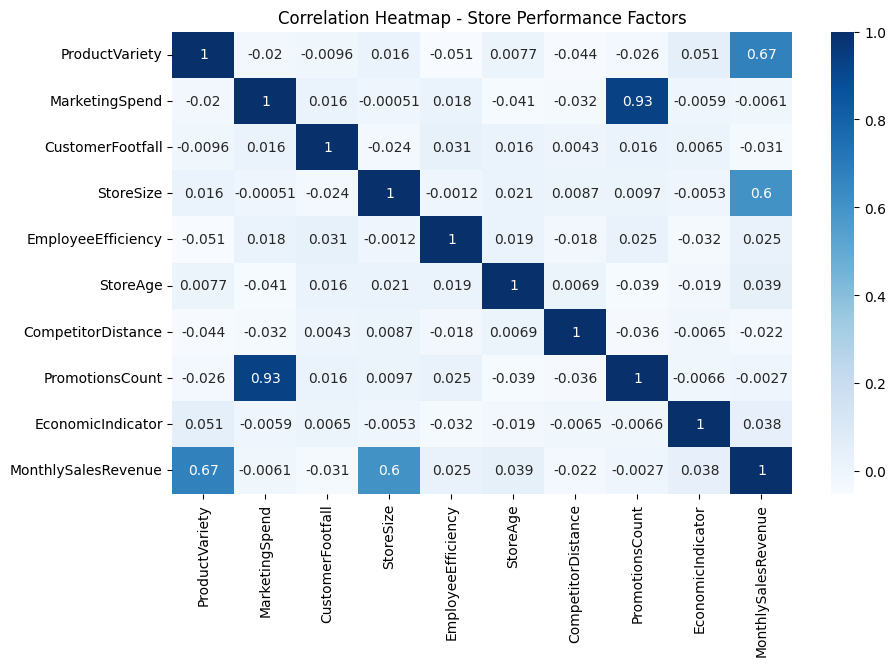

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Correlation Heatmap - Store Performance Factors")
plt.show()

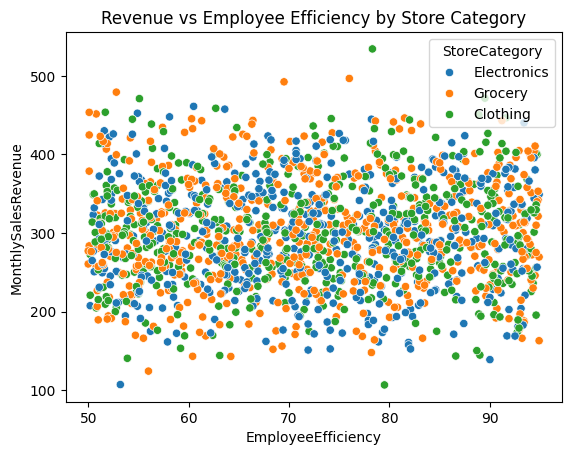

In [14]:
sns.scatterplot(data=df, x='EmployeeEfficiency', y='MonthlySalesRevenue', hue='StoreCategory')
plt.title("Revenue vs Employee Efficiency by Store Category")
plt.show()

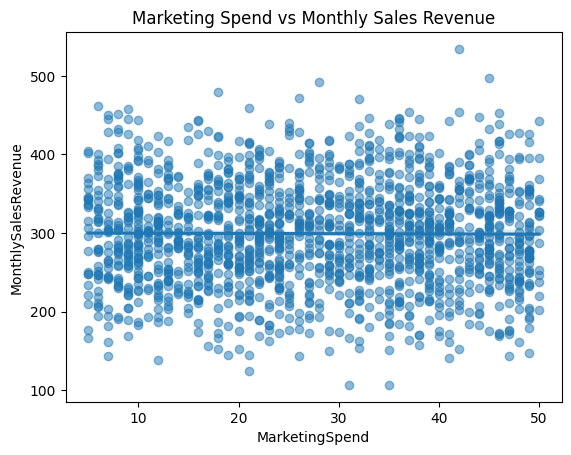

In [15]:
sns.regplot(data=df, x='MarketingSpend', y='MonthlySalesRevenue', scatter_kws={'alpha':0.5})
plt.title("Marketing Spend vs Monthly Sales Revenue")
plt.show()

In [16]:
# Find top 5 stores by revenue
top5 = df.sort_values(by='MonthlySalesRevenue', ascending=False).head(5)
print(top5[['StoreLocation', 'StoreCategory', 'MonthlySalesRevenue']])

# Group by category
category_perf = df.groupby('StoreCategory')['MonthlySalesRevenue'].agg(['mean','sum','count']).sort_values('sum', ascending=False)
print(category_perf)

      StoreLocation StoreCategory  MonthlySalesRevenue
343       Palo Alto      Clothing               534.26
1288    Los Angeles       Grocery               496.70
1345      Palo Alto       Grocery               492.38
656   San Francisco       Grocery               479.27
711      Sacramento      Clothing               471.58
                     mean        sum  count
StoreCategory                              
Grocery        301.325571  176878.11    587
Clothing       300.863125  158855.73    528
Electronics    295.390804  158034.08    535


In [17]:
df.to_csv("cleanedstoresales.csv", index=False)

In [18]:
df.to_excel("cleanedstoresales.xlsx", index=False)